# Importing The Modules

In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras.applications import resnet50
from keras.models import *
from keras.layers import *
import keras
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
warnings.filterwarnings('ignore')


# Data Preparation

In [3]:
def data_prep(parasitized,uninfected):

    parasitized= ["C://Users//bhoom//Desktop//Projects//Untitled Folder 1//cell_images//cell_images//Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["C://Users//bhoom//Desktop//Projects//Untitled Folder 1//cell_images//cell_images//Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('C://Users//bhoom//Desktop//Projects//Untitled Folder 1//cell_images//cell_images//Parasitized'), os.listdir('C://Users//bhoom//Desktop//Projects//Untitled Folder 1//cell_images//cell_images//Uninfected'))
df.head()

,Image_Path,Labels
0,C://Users//bhoom//Desktop//Projects//Untitled ...,parasitized
1,C://Users//bhoom//Desktop//Projects//Untitled ...,parasitized
2,C://Users//bhoom//Desktop//Projects//Untitled ...,parasitized
3,C://Users//bhoom//Desktop//Projects//Untitled ...,parasitized
4,C://Users//bhoom//Desktop//Projects//Untitled ...,parasitized


# Displaying 5 Images For Each Of The Two Labels

Displaying 5 Parasitized Images: 



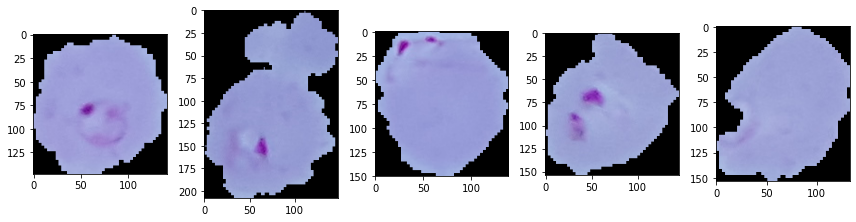


Displaying 5 Uninfected Images: 



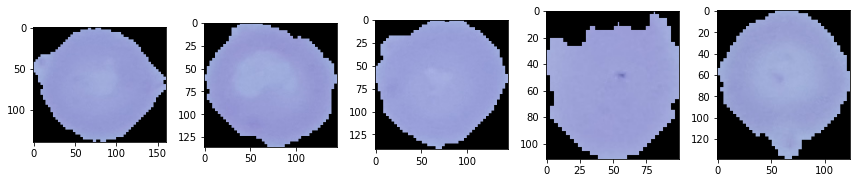

In [4]:

print("Displaying 5 Parasitized Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Displaying 5 Uninfected Images: ")
print()
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


# Distribution Of Samples

Text(0.5, 1.0, 'Distribution of samples according to the categories')

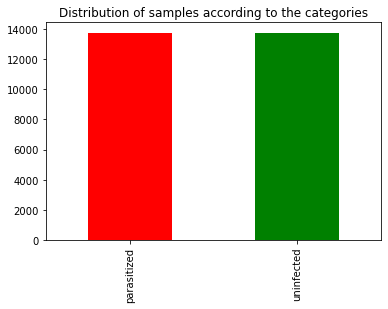

In [5]:
df['Labels'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of samples according to the categories')

# Augmenting The Data

In [6]:

train, test = train_test_split(df, test_size = .20)

img_datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest', validation_split=0.2)
                               
                               
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [7]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()


# Building CNN

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 53s 492ms/step - loss: 6.0954 - accuracy: 0.5317 - val_loss: 0.7047 - val_accuracy: 0.5550
Epoch 2/4
100/100 [==============================] - 43s 431ms/step - loss: 0.7166 - accuracy: 0.5489 - val_loss: 0.6863 - val_accuracy: 0.5720
Epoch 3/4
100/100 [==============================] - 45s 448ms/step - loss: 0.6896 - accuracy: 0.5602 - val_loss: 0.6591 - val_accuracy: 0.5930
Epoch 4/4
100/100 [==============================] - 45s 451ms/step - loss: 0.6311 - accuracy: 0.6289 - val_loss: 0.5047 - val_accuracy: 0.7580


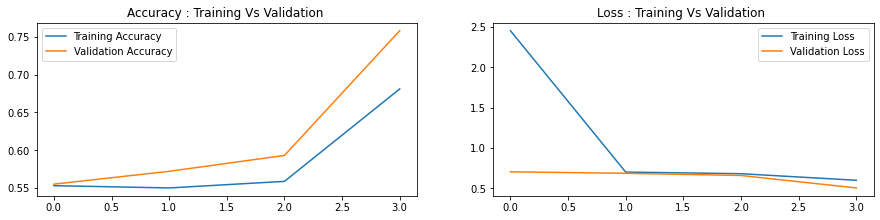

In [8]:
def cnn_model(df, train, test, my_callbacks):
    
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(134,134), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(130,130,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model_history = model.fit_generator(generator = x_train, 
                   steps_per_epoch = 100,
                   epochs = 4 ,
                   validation_data = x_test,
                   validation_steps = 100, callbacks=my_callbacks)
    
    return model_history

    
plot_loss_and_accuracy(cnn_model(df, train, test, my_callbacks))


# Building ResNet50

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
Epoch 1/4
100/100 [==============================] - 260s 2s/step - loss: 0.7512 - accuracy: 0.7349 - val_loss: 1.2438 - val_accuracy: 0.7700
Epoch 2/4
100/100 [==============================] - 157s 2s/step - loss: 0.5052 - accuracy: 0.8498 - val_loss: 2.0695 - val_accuracy: 0.7990
Epoch 3/4
100/100 [==============================] - 156s 2s/step - loss: 0.4567 - accuracy: 0.8787 - val_loss: 1.4481 - val_accuracy: 0.9150


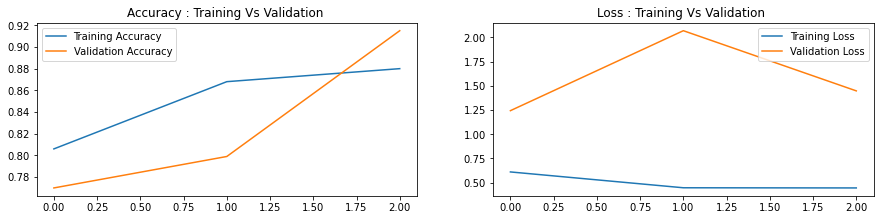

In [9]:
def resnet_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    resnet_model=resnet50.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100,
    epochs = 4, callbacks=my_callbacks)
    
    
    return model_history
    
plot_loss_and_accuracy(resnet_model(df, train, test, my_callbacks))

# Building VGG 19

In [ ]:
def vgg19_model(df, train, test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(224,224), shuffle=False, batch_size=10, seed=10, subset='validation')
    
    vgg19_model = VGG19(input_shape=(224,224,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=100,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 4 , callbacks=my_callbacks)
    
    return model_history
    
plot_loss_and_accuracy(vgg19_model(df, train, test, my_callbacks))

Found 17637 validated image filenames belonging to 2 classes.
Found 1102 validated image filenames belonging to 2 classes.
80142336/80134624 [==============================] - 6s 0us/step
Epoch 1/4
100/100 [==============================] - 1772s 18s/step - loss: 1.8768 - accuracy: 0.5329 - val_loss: 0.5188 - val_accuracy: 0.8740
Epoch 2/4
100/100 [==============================] - 1747s 18s/step - loss: 0.4422 - accuracy: 0.8619 - val_loss: 0.2008 - val_accuracy: 0.9250
Epoch 3/4
100/100 [==============================] - 1786s 18s/step - loss: 0.3519 - accuracy: 0.9070 - val_loss: 0.3947 - val_accuracy: 0.9350
Epoch 4/4
 28/100 [=======>......................] - ETA: 18:33 - loss: 0.2736 - accuracy: 0.9347

In [ ]:
#GRID SEARCH THOUGH CROSS VALIDATION
def best_performance_of(classifier, params, x_train, y_train, x_test, y_test, cross_validation = 10, save= False, feature_type = "neural_feature"):
    print("Grid search for: ", classifier)
    clf = GridSearchCV(classifier, params, n_jobs=multiprocessing.cpu_count(), cv=cross_validation, verbose=3)
    #Fit and search best param
    #with parallel_backend('threading'):
      #clf.fit(x_train, y_train)
    clf.fit(x_train, y_train)
    print("\nBest parameters set:")
    print(clf.best_params_)
    #used to print confusion matrix
    y_predict=clf.best_estimator_.predict(x_test)
    
    confusion_m = confusion_matrix(y_test, y_predict)
    index = ['bad','good']  
    columns = ['bad','good']
    cm_df = pd.DataFrame(confusion_m,columns,index)                      
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(cm_df, annot=True, cmap="Blues")
    fig = heatmap.get_figure()
    fig.savefig(figure_directory + type(classifier).__name__ + "_" + feature_type + "_" + "matrix.pdf")
    plt.show()
    print("confusion matrix:")
    print(confusion_m)
    #Same information
    print("\nClassification report:")
    print(classification_report(y_test, y_predict))
    print("Best estimator score: ", clf.best_estimator_.score(x_test, y_test))
    #Store classifier if save is true
    if(save):
        score = int(clf.best_estimator_.score(x_test, y_test) * 100)
        print("store:" + "max" + str(score) +  ".sav")
        joblib.dump(clf.best_estimator_, classifiers_directory + "max" + str(score) +  ".sav")

In [ ]:
################ NEURAL FEATURE EXTRACTION #############
extract = Model(model.inputs, model.layers[-5].output)
x_train_neural_features = extract.predict(x_train)
x_valid_neural_features = extract.predict(x_valid)
x_test_neural_features = extract.predict(x_test)
print("Extracted features from flatten layer, shape:", x_train_neural_features.shape)

################# TRAIN CLASSIFIERS ON NEURAL FEATURES ################
grid_search = False
if grid_search:
    #### SVM
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                        'C': [1, 10, 100]}]

    best_performance_of(svm.SVC(), tuned_parameters, 
                        x_train = x_train_neural_features, y_train = y_train, x_test = x_test_neural_features, y_test = y_test)

    #### RANDOM FOREST
    tuned_parameters = {"max_depth":[11,13,15,17,20]}
    best_performance_of(RandomForestClassifier(random_state=0), tuned_parameters, 
                        x_train = x_train_neural_features, y_train = y_train, x_test = x_test_neural_features, y_test = y_test)
    
    #### KNN
    tuned_parameters = {"n_neighbors": [3,5,9,11,15,17,19],}
    best_performance_of(KNeighborsClassifier(), tuned_parameters,
                        x_train = x_train_neural_features, y_train = y_train, x_test = x_test_neural_features, y_test = y_test)

####### SVM
svm_neural = svm.SVC(gamma=0.001, C=1, kernel='rbf') # [10, 0.001] V [1, 0.001]
####### RANDOM FOREST
rf_neural = RandomForestClassifier(max_depth=16, random_state=0)
####### KNN
knn_neural = KNeighborsClassifier(n_neighbors = 5) #5

################### MAJORITY NEURAL CLASSIFIER ####################
print("SVM/RF/KNN training on neural features...")
multi_neural = VotingClassifier(estimators=[
       ('svm', svm_neural), ('rf', rf_neural), ('knn', knn_neural)],
       voting='hard', weights=[1.2,1,1],
       flatten_transform=True, n_jobs=-1)
multi_neural = multi_neural.fit(x_train_neural_features, y_train)
multi_neural_predicted = multi_neural.predict(x_test_neural_features)
print("SVM/RF/KNN neural features accuracy score:", accuracy_score(y_test, multi_neural_predicted))